In [1]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

Set our list of targets, the disease to run against and number of top associations to return to filter through

In [2]:
mytargets = ['DRD2', 'DRD4', 'PINK1', 'GRIN1', 'FRED']
disease = "EFO_0002508"
maxresults = 50  # max 10,000

Make the API call with our disease to find the top results (ordered by overall score descending)

In [3]:
url = 'https://www.targetvalidation.org/api/latest/public/association/filter'
headers = {"Accept": "application/json"}
data = "{\"disease\":[\"" + disease + "\"], \"size\":" + str(maxresults) + "}"

response = requests.post(url, headers=headers, data=data)
output = response.json()

#print out the json for debug
#print json.dumps(output, indent=2)

Run through all the targets and identify those we're interested in

In [4]:
datatypes = ['Association score', 'Genetic associations', 'Somatic mutations', 'Drugs', 'Affected pathways', 'RNA expression', 'Text mining', 'Animal models']


df = pd.DataFrame()

for target in output['data']:
    if target['target']['gene_info']['symbol'] in mytargets:

        s = pd.Series([
                target['association_score']['overall'],
                target['association_score']['datatypes']['genetic_association'],
                target['association_score']['datatypes']['somatic_mutation'],
                target['association_score']['datatypes']['known_drug'],
                target['association_score']['datatypes']['affected_pathway'],
                target['association_score']['datatypes']['rna_expression'],
                target['association_score']['datatypes']['literature'],
                target['association_score']['datatypes']['animal_model']
            ], index=datatypes, name=str(target['target']['gene_info']['symbol']))
                
        df = df.append(s, ignore_index=False)

# Reorder columns to the datatypes list to match OpenTargets
df = df.reindex(columns=datatypes)


In [5]:
print "Targets that have an association to " + disease + ":"
print df.index
print
print "Targets that had no recorded association in the top " + str(maxresults) + " results returned for disease " + disease + ":"
print list(set(mytargets)-set(df.index))

Targets that have an association to EFO_0002508:
Index([u'DRD2', u'DRD4', u'PINK1', u'GRIN1'], dtype='object')

Targets that had no recorded association in the top 50 results returned for disease EFO_0002508:
['FRED']


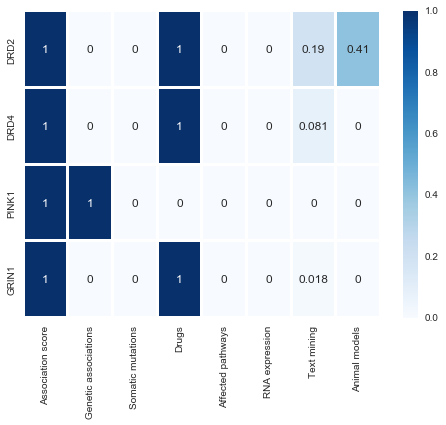

In [6]:
%matplotlib inline
import seaborn as sns; sns.set()
ax = sns.heatmap(df, cmap=plt.cm.Blues, annot=True, linewidths=2)
sns.plt.show()